In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 设置默认字体
plt.rcParams['font.sans-serif']=['Times New Roman'] 


## Fig4(a)

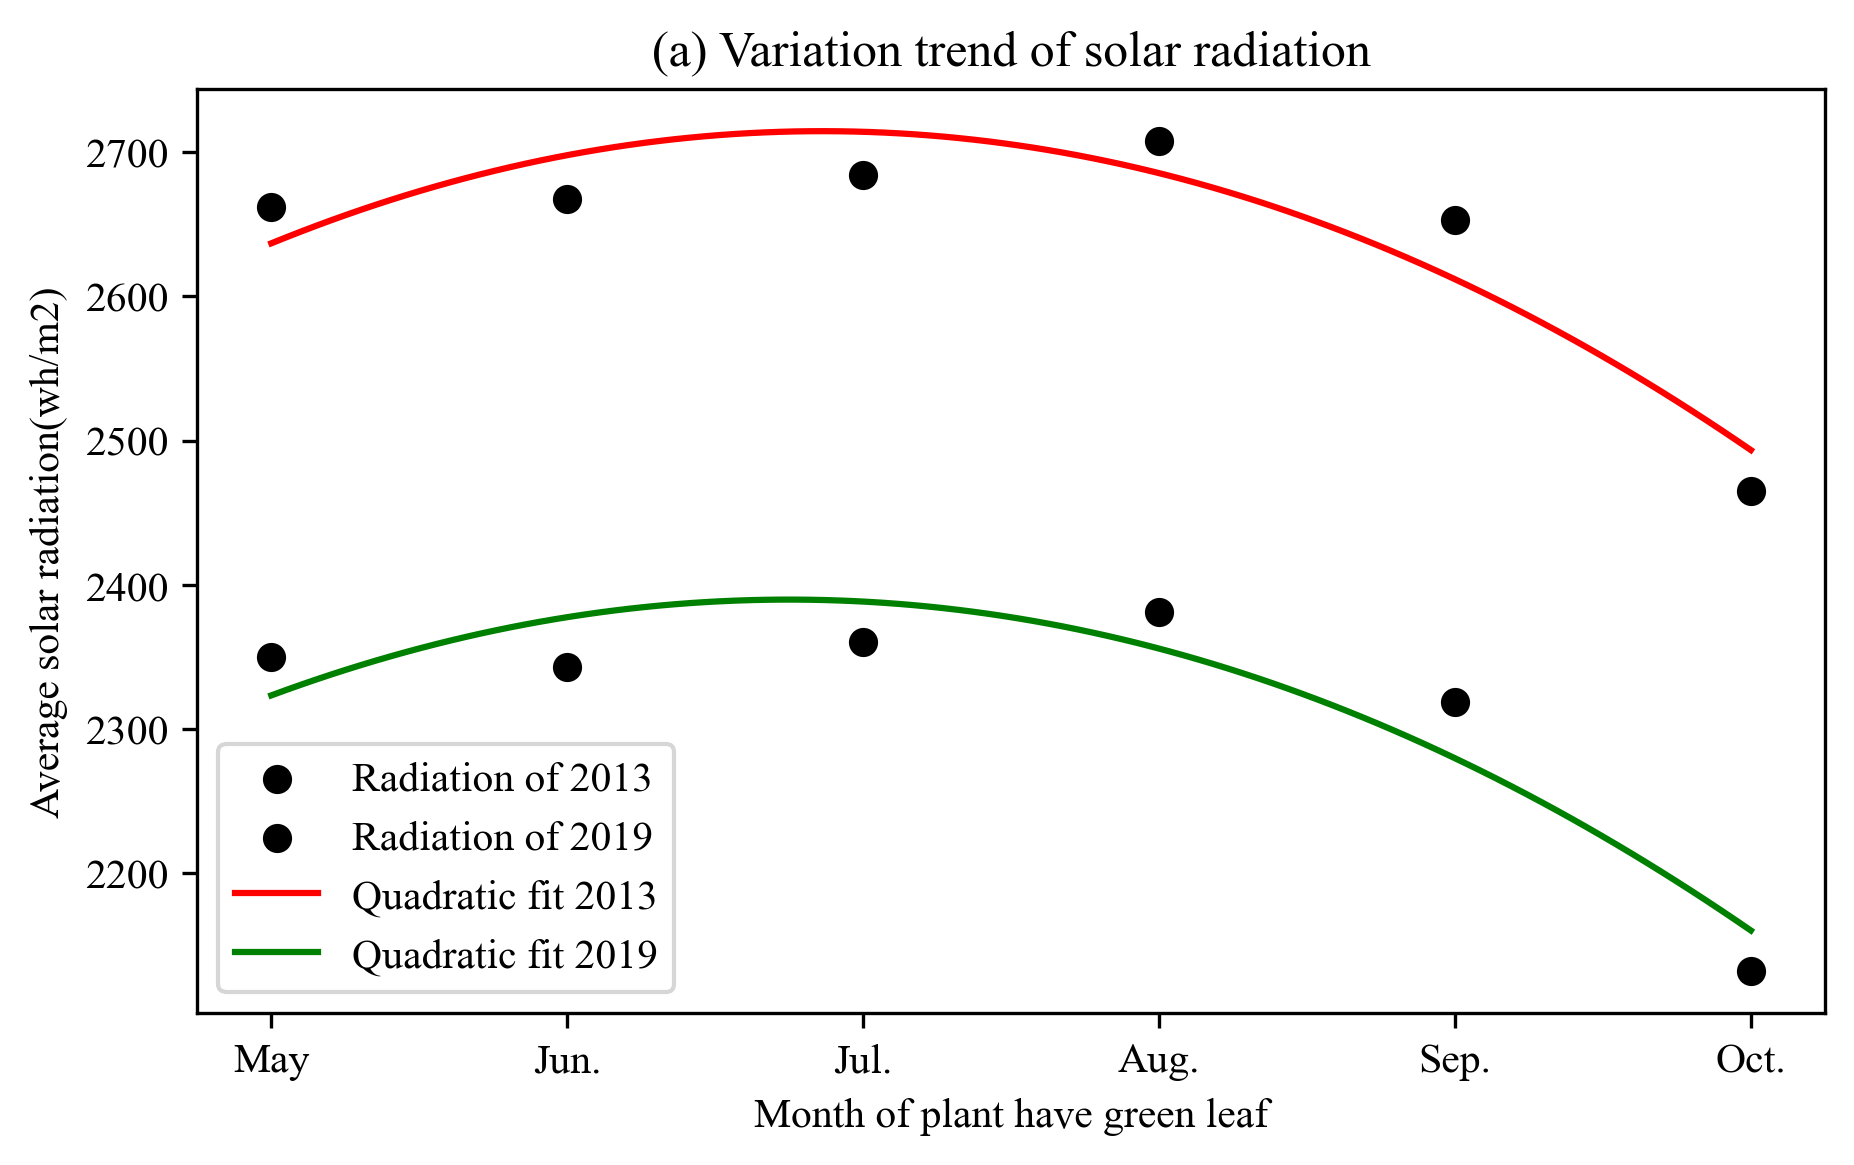

In [54]:

# 给定数据
rad_2013 = [2661.77957, 2667.53364, 2684.58175, 2708.04279, 2653.12583, 2464.95974]
rad_2019 = [2350.05813, 2342.77585, 2360.06397, 2381.18662, 2318.69477, 2131.96763]

# 设置绘图尺寸
fig, ax = plt.subplots(figsize=(7,4),dpi=300)

# 创建x轴数据（假设是列表的索引）
x_data = np.arange(6)

# 绘制散点图
plt.scatter(x_data, rad_2013, color='black', label='Radiation of 2013')
plt.scatter(x_data, rad_2019, color='black', label='Radiation of 2019')

# 一元二次拟合
coeffs_2013 = np.polyfit(x_data, rad_2013, 2)
fit_function_2013 = np.poly1d(coeffs_2013)

coeffs_2019 = np.polyfit(x_data, rad_2019, 2)
fit_function_2019 = np.poly1d(coeffs_2019)

# 创建拟合线的x轴数据
x_fit = np.linspace(x_data[0], x_data[-1], 100)

# 计算拟合线的y轴数据
y_fit_2013 = fit_function_2013(x_fit)
y_fit_2019 = fit_function_2019(x_fit)

# 绘制拟合线
plt.plot(x_fit, y_fit_2013, 'r', label='Quadratic fit 2013')
plt.plot(x_fit, y_fit_2019, 'g', label='Quadratic fit 2019')

# 设置x轴刻度标签
x_labels = ['May', 'Jun.', 'Jul.', 'Aug.', 'Sep.', 'Oct.']
plt.xticks(x_data, x_labels)

# 显示图例
plt.legend()

# 设置轴标签
plt.xlabel('Month of plant have green leaf')
plt.ylabel('Average solar radiation(wh/m2)')

# 设置图标题
plt.title('(a) Variation trend of solar radiation')

# 显示图
plt.show()


In [55]:
import numpy as np

def calculate_r_squared(y_data, y_fit):
    # 计算均值
    y_mean = np.mean(y_data)
    
    # 计算SST
    sst = np.sum((y_data - y_mean) ** 2)
    
    # 计算SSE
    sse = np.sum((y_data - y_fit) ** 2)
    
    # 计算R²值
    r_squared = 1 - (sse / sst)
    
    return r_squared

# 计算拟合曲线的y值
y_fit_2013_full = fit_function_2013(x_data)
y_fit_2019_full = fit_function_2019(x_data)

# 计算R²值
r_squared_2013 = calculate_r_squared(rad_2013, y_fit_2013_full)
r_squared_2019 = calculate_r_squared(rad_2019, y_fit_2019_full)

print("R² value for 2013:", r_squared_2013)
print("R² value for 2019:", r_squared_2019)


R² value for 2013: 0.8592640516009735
R² value for 2019: 0.8642261041879817


## Fig4(b)

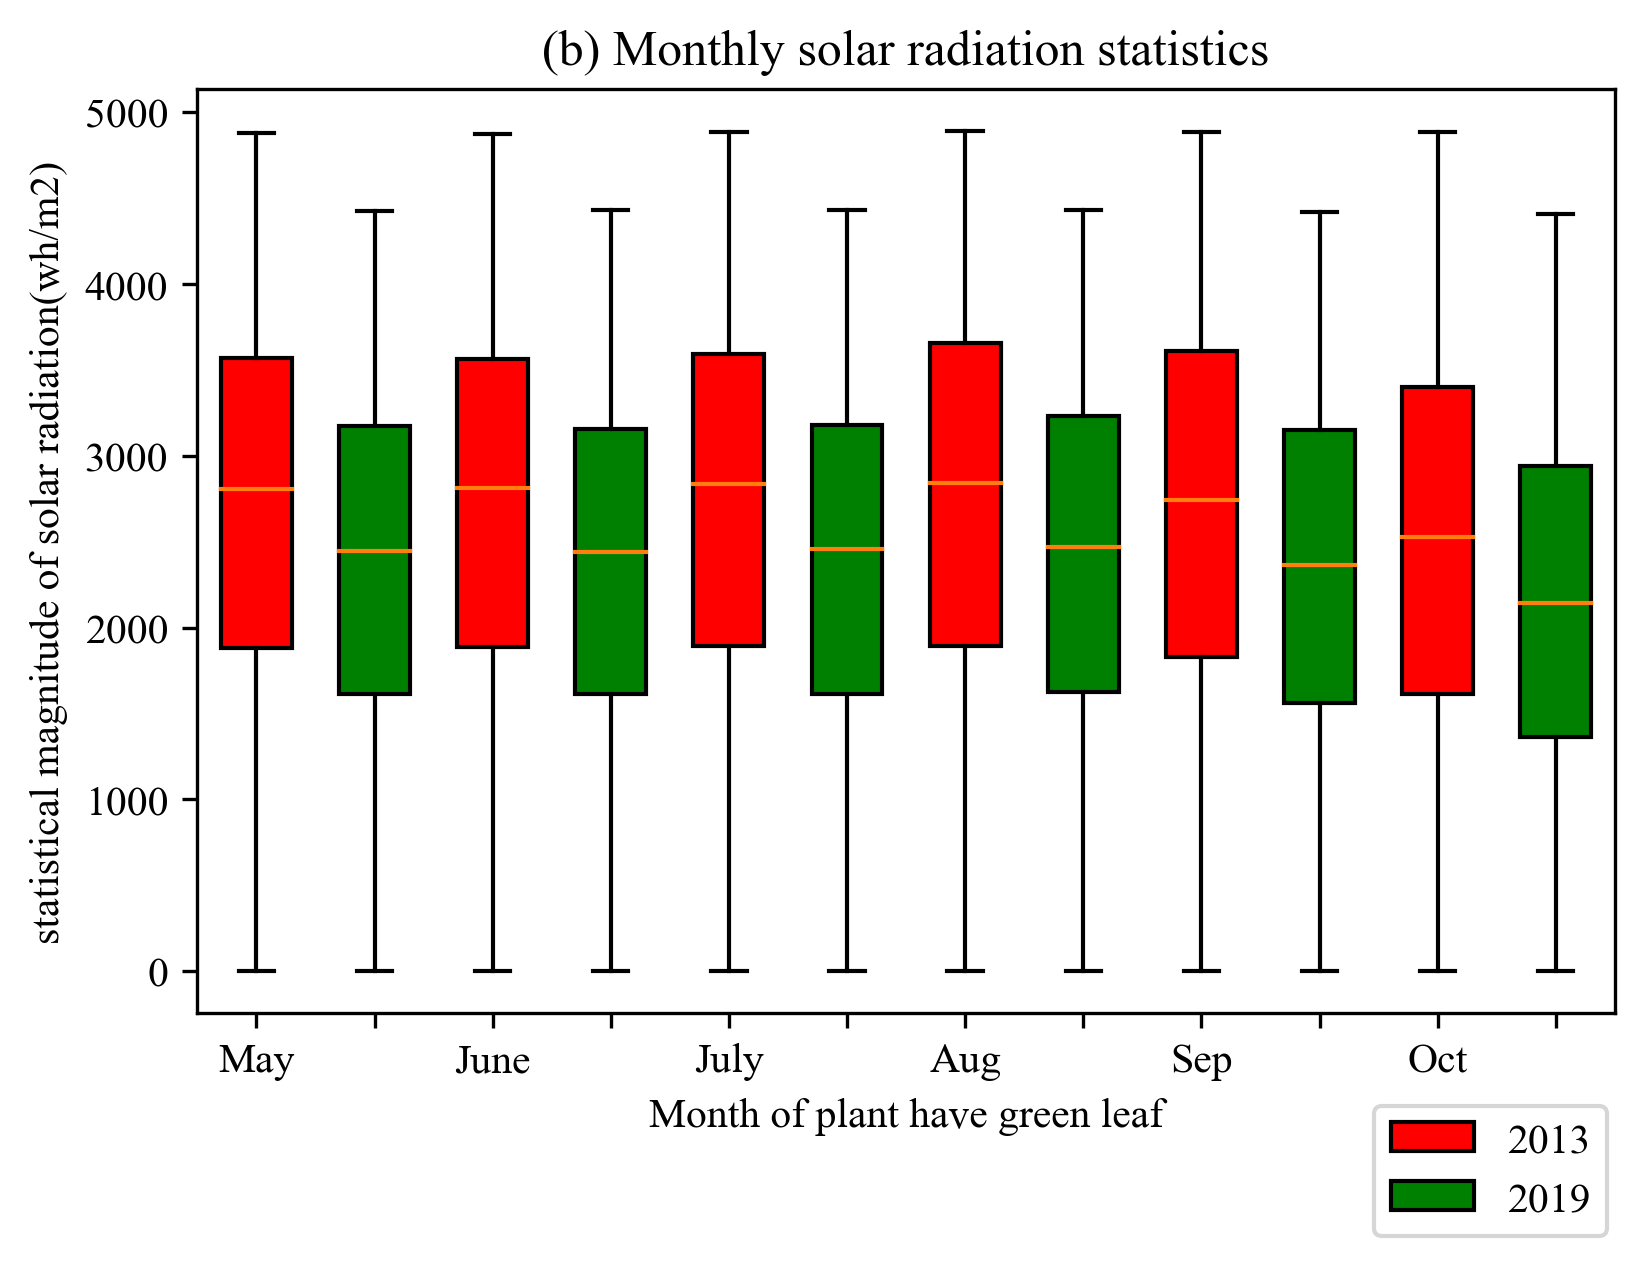

In [52]:


# 读取csv文件
rad_2013 = pd.read_csv('5.2013_radiation.csv')
rad_2019 = pd.read_csv('5.2019_radiation.csv')

# 设置绘图尺寸
fig, ax = plt.subplots(figsize=(7, 4), dpi=300)
fig.subplots_adjust(right=0.8)

# 提取数据并重塑
rad_2013_data = rad_2013.melt(id_vars=['name'], var_name='Month', value_name='Value')
rad_2019_data = rad_2019.melt(id_vars=['name'], var_name='Month', value_name='Value')

# 设置月份顺序
months = ['May', 'June', 'July', 'Aug', 'Sep', 'Oct']

label = ['May', 'June', 'July', 'Aug', 'Sep', 'Oct']


# 绘制箱线图
bplot1 = ax.boxplot([rad_2013_data[rad_2013_data['Month'] == month]['Value'] for month in months],
                    positions=range(0, len(months) * 2, 2), widths=0.6, patch_artist=True, boxprops=dict(facecolor='red'), labels=label)

bplot2 = ax.boxplot([rad_2019_data[rad_2019_data['Month'] == month]['Value'] for month in months],
                    positions=range(1, len(months) * 2 + 1, 2), widths=0.6, patch_artist=True, boxprops=dict(facecolor='green'),labels=['']*len(months))

# 设置label的对齐方式为右对齐
ax.tick_params(axis='x', which='major')

# 设置标题和轴标签
ax.set_title('(b) Monthly solar radiation statistics')
ax.set_xlabel('Month of plant have green leaf')
ax.set_ylabel('statistical magnitude of solar radiation(wh/m2)')

# 添加图例
plt.legend([bplot1['boxes'][0], bplot2['boxes'][0]], ['2013', '2019'], bbox_to_anchor=(0.83, -0.1), loc='upper left', borderaxespad=0.)
plt.show()

# 显示箱线图
plt.show()
